<a href="https://colab.research.google.com/github/chengren/bky_hw_lab/blob/edu/Lab_Visualizing_representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab: Visualizing representations<br>
Author: Zhi Li / Cheng Ren / Xianyou Li

In [0]:
#import dependency
import pandas as pd
import numpy as np
import gensim
import requests
import io
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
url = "https://raw.githubusercontent.com/chengren/bky_hw_lab/master/Machine%20Learning%20in%20Edu/skill.tsv"
df = pd.read_csv(url,sep='\t')
df = df.iloc[:,1:]
df.head()

,student_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,...,s60,s61,s62,s63,s64,s65,s66,s67,s68,s69,s70,s71,s72,s73,s74,s75,s76,s77,s78,s79,s80,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
0,64525,1,1,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,4,4,4,5,5,6,6,6,7,7,7,7,7,7,7,7,7,7,7,8,8,8,...,12,12,12,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,16,16,17,18,18,18
1,70363,1,1,1,1,2,2,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,6,6,6,6,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9
2,70677,1,1,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,...,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,15
3,70695,1,1,3,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,9,9,9,9,10,10,10,10,10,10,11,11,12,12,12,18,18,19,19,...,32,32,32,32,32,32,32,32,32,32,32,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
4,70699,1,1,2,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,9,10,10,10,10,10,10,11,...,30,30,32,32,32,32,32,32,33,34,34,34,36,37,37,37,37,37,37,37,37,39,39,39,39,39,39,39,39,42,42,42,42,44,44,44,45,46,46,46


In [3]:
#import id-skill mappings
skills = "https://raw.githubusercontent.com/chengren/bky_hw_lab/master/Machine%20Learning%20in%20Edu/skillid_name_dict-1.csv"
mappings = pd.read_csv(skills, header=None)
mappings.columns = ['id', 'skill']
mappings['id'] = mappings['id'].astype(int).astype(str)
mappings = mappings.set_index('id')
mappings.head()

,skill
id,
47,Conversion of Fraction Decimals Percents
2,Circle Graph
70,Percent Of
77,Finding Percents
83,Divisibility Rules


## Question 1
Train a skip-gram model 

In [0]:
#train skip-gram
sequences = df.iloc[:,1:].astype(str).values.tolist()
model = gensim.models.Word2Vec(sequences, sg=1, size=30, window=5, min_count=10, iter=30)

In [5]:
#get keys, vectors, skill list
keys = list(model.wv.vocab.keys())
vectors = model.wv.vectors
skills = mappings.loc[keys,'skill'].values.tolist()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


## Question 2.1
Reduce dimensionality and visualization

In [0]:
#reduce dimensions
embedded = TSNE(n_components=2).fit_transform(vectors)

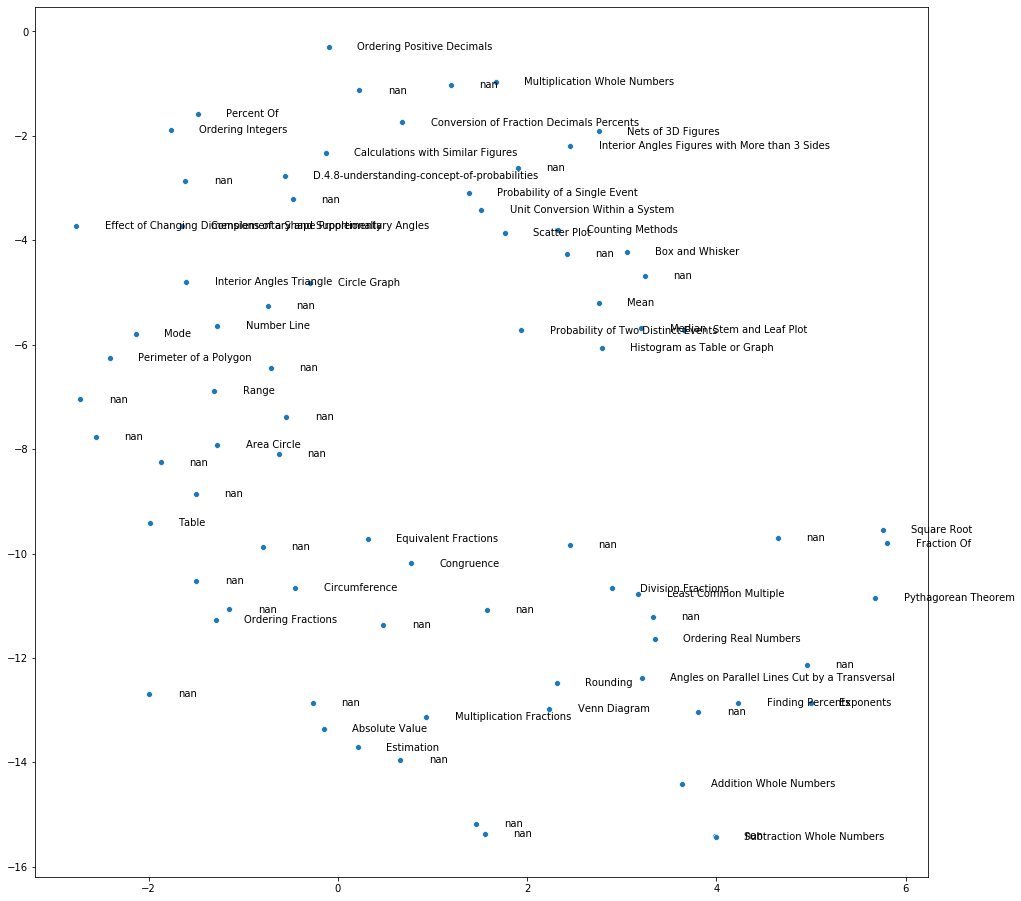

In [7]:
#visualization
plt.figure(figsize=(16,16))
sns.scatterplot(x=embedded[:,0], y=embedded[:,1])
for i in range(len(embedded)):
    plt.text(embedded[i,0]+0.3, embedded[i,1], skills[i], verticalalignment='center')

## Question 2.2
D3-scatterplot tools<br>
Note:Colab cannot run D3-scatterplot tools, so we run on the PC and screenshot the result.

In [0]:
#generate d3-scatterplot tsv
data = pd.DataFrame(embedded)
data.columns = ['x', 'y']
data['skill'] = skills
data.to_csv('viz.tsv', sep='\t', index=False)

The following code should be ran in bash or command line

In [0]:
#git clone https://github.com/CAHLR/d3-scatterplot.git
#sudo apt install npm
#cd d3-scatterplot/
#npm install
#python3 -m http.server
########
#Go to chrome and open http://localhost:8000/index.html?dataset=viz.tsv

![alt text](https://github.com/chengren/bky_hw_lab/blob/master/Machine%20Learning%20in%20Edu/Capture.PNG?raw=true)

## Question 4

From the visualization, we can see that some similar skills are close to each other. For example, mean and median are very close. And there is a region in the right with geometric skills including Interior Angles Triangle, Complementary and Supplementary Angles, and Circle Graph.

## Questions 5
Re-train the skip-gram model using different hyperparameters (try a window size of 1). How does the vector size and window size appear to affect the 
visualization?

In [0]:
model2 = gensim.models.Word2Vec(sequences, sg=1, size=30, window=1, min_count=10, iter=30)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


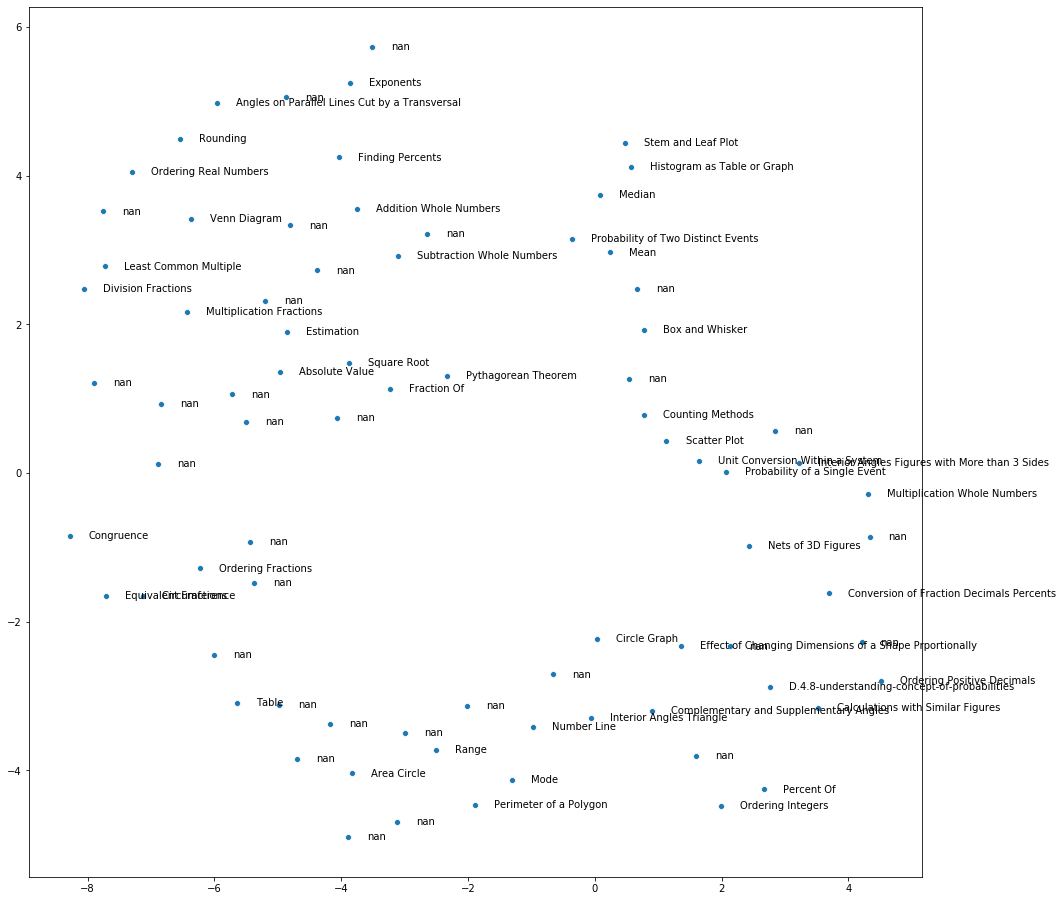

In [11]:
#get keys, vectors, skill list
keys2 = list(model2.wv.vocab.keys())
vectors2 = model2.wv.vectors
skills2 = mappings.loc[keys2,'skill'].values.tolist()
#reduce dimensionality
embedded2 = TSNE(n_components=2).fit_transform(vectors2)
#visualization
plt.figure(figsize=(16,16))
sns.scatterplot(x=embedded2[:,0], y=embedded2[:,1])
for i in range(len(embedded2)):
    plt.text(embedded2[i,0]+0.3, embedded2[i,1], skills2[i], verticalalignment='center')

When increse the word window size, the cluster become more dense and the boudary become more clear. However, even we decrease the window size, skills were toghether before are still clode.

## Questions 6
Repeat steps 1 through 4 but using the assistments_id.tsvPreview the document file instead. This will be a visualization of problems (more numerous) instead of skills. Color assistment plot point by their skill. Do they cluster by skill?

In [12]:
ass_id = "https://raw.githubusercontent.com/chengren/bky_hw_lab/master/Machine%20Learning%20in%20Edu/assistment_id.tsv"
assistment_id = pd.read_csv(ass_id ,sep='\t')
assistment_id = assistment_id.iloc[:,1:]
assistment_id.head()

,student_id,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35,a36,a37,a38,...,a60,a61,a62,a63,a64,a65,a66,a67,a68,a69,a70,a71,a72,a73,a74,a75,a76,a77,a78,a79,a80,a81,a82,a83,a84,a85,a86,a87,a88,a89,a90,a91,a92,a93,a94,a95,a96,a97,a98,a99
0,64525,33139,33150,52640,52655,52647,53476,53477,53458,36836,37079,36839,37065,31415,31406,33089,33093,53146,39831,35982,36026,36425,31963,36923,36950,53584,32020,32049,36508,36505,36593,36591,31781,37038,37027,36535,36539,53237,36765,36816,...,36535,36539,53584,53676,41717,41721,41720,41713,41730,41968,41959,41993,41752,53757,53794,53809,42031,42039,41717,41721,41720,41713,41730,41968,41959,41993,41752,41981,41680,41682,41846,41862,37038,37027,42109,50311,42109,41094,50138,41095
1,70363,33110,33172,33174,33123,31398,36845,31412,36841,36821,36845,33047,33091,33071,36002,35793,35995,35989,35953,35959,35984,36086,36065,36057,36056,31981,36435,36898,36934,36886,36872,36949,36858,36896,36889,31597,31604,31586,31613,31592,...,32025,32038,36496,36491,36475,36510,36522,36529,36581,36571,32822,36762,36778,36774,36808,31349,31350,31351,36799,31325,31354,31358,31307,31326,31353,31346,31310,36763,36764,31323,31322,31313,31326,31328,31316,32047,32019,36872,36949,36858
2,70677,33168,33112,31968,31970,53345,53301,53317,31960,36433,53330,53323,53335,53609,36964,36958,36962,36856,53619,32038,32053,36509,36470,36524,36517,36521,36541,36522,32055,32051,36507,36506,36566,36570,36522,36534,36567,36576,36529,36537,...,31316,31319,31326,31307,31313,31332,31312,32038,32053,32055,32051,36964,36958,36962,36856,36509,36470,36507,36506,51784,33112,36566,36570,36567,36576,53609,32833,32824,53619,36524,36517,36521,36541,36522,36522,36534,36529,36537,33168,41674
3,70695,33149,33188,33040,32023,32017,32021,32054,36479,36463,36582,36566,36525,36529,53247,53254,53190,36801,36775,36770,36769,32023,32017,32021,32054,51890,51870,52241,36479,36463,33149,36582,36566,36525,36529,33188,50136,41113,50066,50098,...,47216,47209,47190,47217,39472,33750,38628,47233,39512,33699,39233,39297,55632,55655,55645,55631,55641,55656,55640,55659,55630,38628,39327,39233,55656,55640,55631,55623,55648,55654,55641,55646,55632,55659,55625,55644,55649,55638,55651,55652
4,70699,33145,33151,53417,36901,36938,53592,53579,53617,53612,36461,36508,36590,36566,36519,36526,32870,36469,36497,36818,36805,53256,53240,53241,36789,36781,36804,36780,36781,36772,36764,36783,32870,36461,36508,33145,33151,36469,36497,36938,...,47351,38048,47193,47206,39487,39547,39516,33708,39276,39688,39658,34054,49772,34329,34295,46994,32137,32145,32120,32118,32122,44453,44429,44451,44459,44435,44431,44449,44446,34612,34592,34606,34605,53417,46778,47496,34339,50679,44534,44496


In [13]:
url = "https://drive.google.com/uc?export=download&id=0B3f_gAH-MpBmUmNJQ3RycGpJM0k" 
s = requests.get(url).content 
match= pd.read_csv(io.StringIO(s.decode('latin')))
match = match[['assistment_id','skill_name']]
match['assistment_id'] = match['assistment_id'].astype(str)
match = match.drop_duplicates()
match = match.set_index('assistment_id')
match = match.dropna()
match.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,skill_name
assistment_id,
33139,Box and Whisker
33150,Box and Whisker
33159,Box and Whisker
33110,Box and Whisker
33196,Box and Whisker


In [0]:
#train skip-gram
sequences = assistment_id.iloc[:,1:].astype(str).values.tolist()
model3 = gensim.models.Word2Vec(sequences, size=100, window=5, min_count=10, iter=30)

In [0]:
#get keys, vectors, problems list
keys = list(model3.wv.vocab.keys())
vectors = model3.wv.vectors

In [0]:
#reduce dimenstions
embedded3 = TSNE(n_components=2).fit_transform(vectors)

In [17]:
embedded3 = pd.DataFrame({'id':keys, 'x':embedded3[:,0], 'y':embedded3[:,1]})
embedded3 = embedded3.set_index('id')

df = match.loc[keys,['skill_name']]
df['x'] = embedded3.loc[df.index, 'x']
df['y'] = embedded3.loc[df.index, 'y']
df = df.sort_values(by='skill_name')
df.head()

,skill_name,x,y
assistment_id,,,
47019,Absolute Value,11.917919,28.436392
46998,Absolute Value,15.170935,-33.857903
47024,Absolute Value,15.777665,-33.985748
34297,Absolute Value,10.909652,3.245036
34325,Absolute Value,7.193653,-29.894180


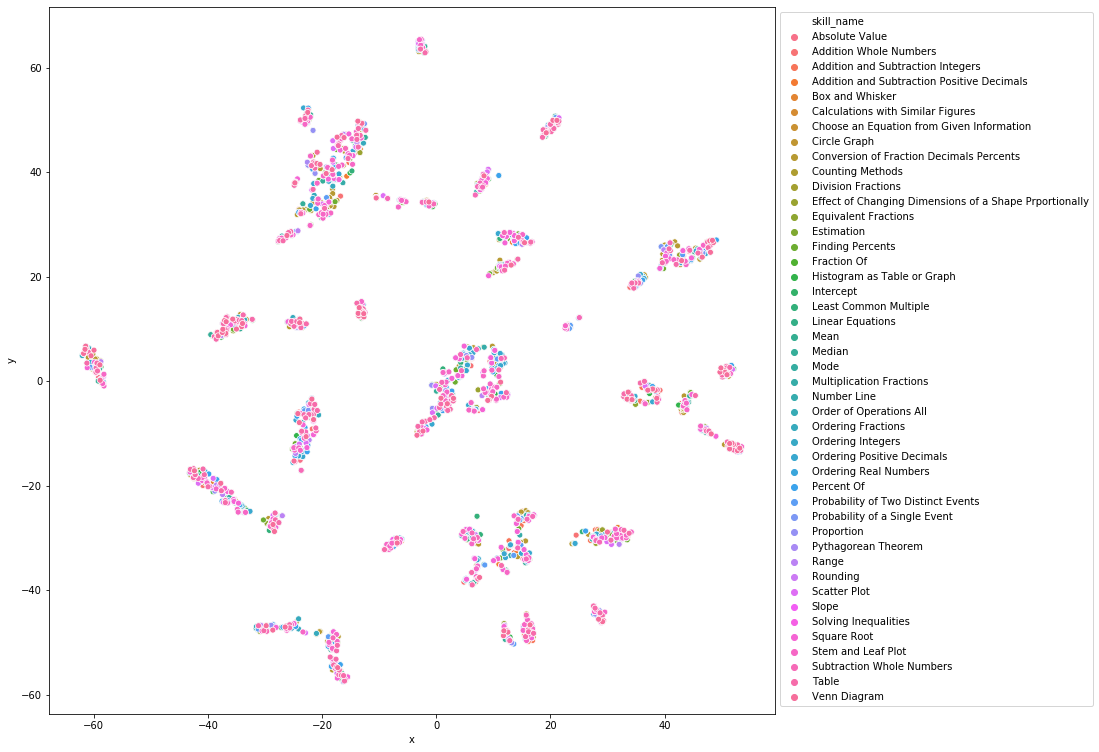

In [18]:
#visualization
plt.figure(figsize=(13,13))
ax = sns.scatterplot(x='x', y='y', hue='skill_name', data=df)
ax.legend(loc='upper left', bbox_to_anchor=(1,1));

#### Result from D-3

![alt text](https://github.com/chengren/bky_hw_lab/blob/master/Machine%20Learning%20in%20Edu/Capture2.PNG?raw=true)

So they do not cluster by skill.